<a href="https://colab.research.google.com/github/iamlekh/NLP/blob/master/C1_W4_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np                     
import matplotlib.pyplot as plt   

In [9]:
import re
import string

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt 


def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean

def get_dict(file_name):
    my_file = pd.read_csv(file_name, delimiter=' ')
    etof = {}  # the english to french dictionary to be returned
    for i in range(len(my_file)):
        en = my_file.loc[i][0]
        fr = my_file.loc[i][1]
        etof[en] = fr
    return etof


def cosine_similarity(A, B):
    cos = -10
    dot = np.dot(A, B)
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)
    cos = dot / (norma * normb)
    return cos

def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)

In [10]:
R = np.array([[2, 0],
              [0, -2]])

In [11]:
x = np.array([[1, 1]])

In [12]:
y = np.dot(x, R)
y

array([[ 2, -2]])

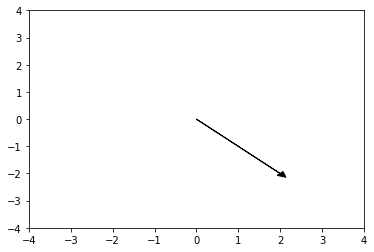

In [15]:
plot_vectors([y], axes=[4, 4], fname='transform_x.svg')

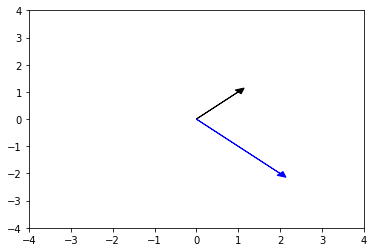

In [16]:
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

In [17]:

angle = 100 * (np.pi / 180) #convert degrees to radians

Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

x2 = np.array([2, 2]).reshape(1, -1) # make it a row vector
y2 = np.dot(x2, Ro)

print('Rotation matrix')
print(Ro)
print('\nRotated vector')
print(y2)

print('\n x2 norm', np.linalg.norm(x2))
print('\n y2 norm', np.linalg.norm(y2))
print('\n Rotation matrix norm', np.linalg.norm(Ro))

Rotation matrix
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]

Rotated vector
[[ 1.62231915 -2.31691186]]

 x2 norm 2.8284271247461903

 y2 norm 2.82842712474619

 Rotation matrix norm 1.414213562373095


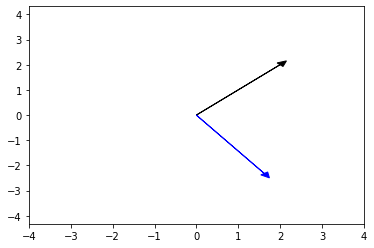

In [18]:
plot_vectors([x2, y2], fname='transform_02.svg')

In [19]:
A = np.array([[2, 2],
              [2, 2]])

In [20]:
A_squared = np.square(A)
A_squared

array([[4, 4],
       [4, 4]])

In [22]:

A_Frobenius = np.sqrt(np.sum(A_squared))
A_Frobenius

4.0

In [21]:
print('Frobenius norm of the Rotation matrix')
print(np.sqrt(np.sum(Ro * Ro)), '== ', np.linalg.norm(Ro))

Frobenius norm of the Rotation matrix
1.414213562373095 ==  1.414213562373095
